In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

import mplhep as hep
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2

## Column values

In [84]:
data = pd.read_csv("output_new.txt", sep=';')
data

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR,CORR
0,0.700556,0.016885,0.299417,0.015314,-0.802255
1,0.687871,0.011883,0.312106,0.010837,-0.801937
2,0.687070,0.009761,0.312907,0.008884,-0.804125
3,0.694966,0.008409,0.305005,0.007646,-0.802248
4,0.693505,0.007486,0.306467,0.006822,-0.801002
...,...,...,...,...,...
995,0.698139,0.001691,0.301861,0.001555,-0.793226
996,0.698386,0.001718,0.301582,0.001556,-0.806483
997,0.698365,0.001699,0.301603,0.001542,-0.804605
998,0.698057,0.001690,0.301912,0.001534,-0.804649


## Information about every column

In [85]:
data.describe()

,BKG PROBABILITY,BKG ERROR,SIGNAL PROBABILITY,SIGNAL ERROR,CORR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.698284,0.003122,0.301697,0.002839,-0.799600
std,0.001782,0.002223,0.001779,0.002019,0.010763
min,0.687070,0.001656,0.299417,0.001523,-0.817784
25%,0.698157,0.001936,0.301011,0.001765,-0.808121
50%,0.698688,0.002349,0.301304,0.002151,-0.803631
75%,0.698969,0.003317,0.301836,0.003016,-0.793219
max,0.700556,0.016885,0.312907,0.015314,-0.783125


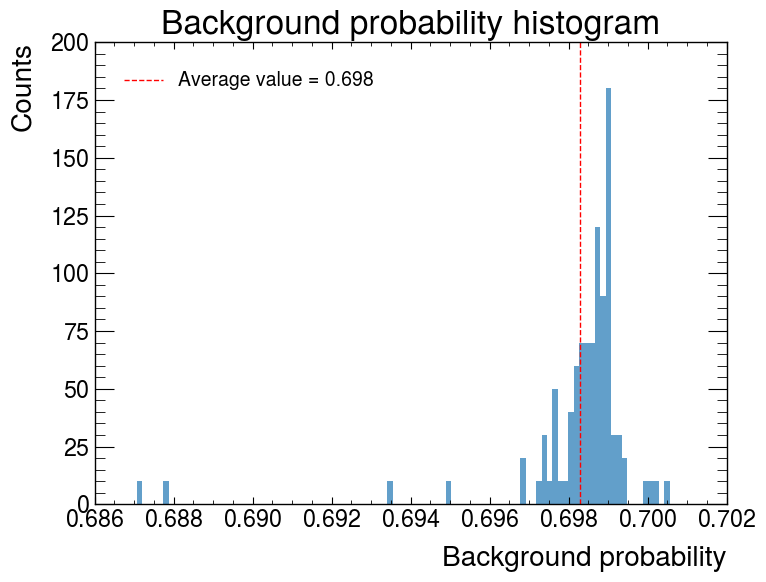

In [86]:
bkg = np.array(data['BKG PROBABILITY'])
bkg_mean = bkg.mean()

N = len(bkg)

plt.hist(bkg, bins=100, alpha=0.7)
plt.axvline(bkg_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(bkg_mean, 3)))
plt.xlabel("Background probability")
plt.ylabel("Counts")
plt.title("Background probability histogram")
plt.legend()

In [87]:
data.keys()

Index(['BKG PROBABILITY', ' BKG ERROR', ' SIGNAL PROBABILITY', ' SIGNAL ERROR',
       ' CORR'],
      dtype='object')

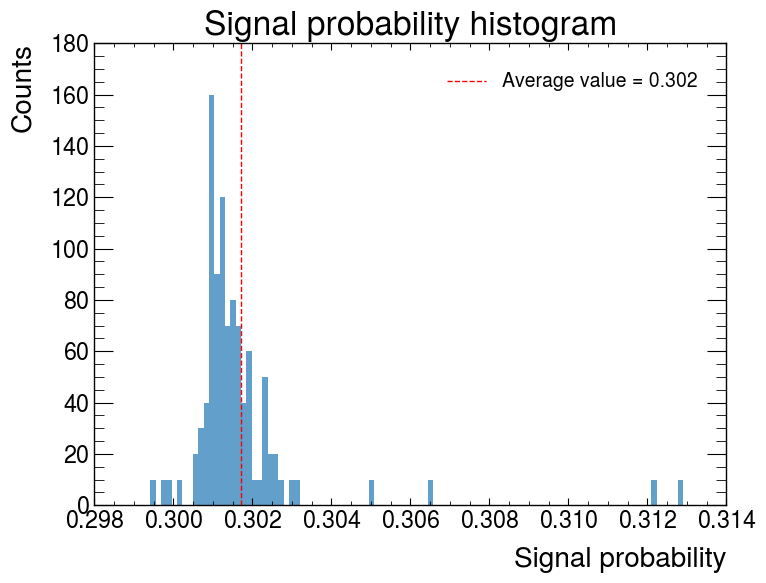

In [88]:
sig = np.array(data[' SIGNAL PROBABILITY'])
sig_mean = sig.mean()

plt.axvline(sig_mean, color='red', linestyle='dashed', linewidth=1, label="Average value = " + str(round(sig_mean, 3)))
plt.hist(sig, bins=100, alpha=0.7)
plt.xlabel("Signal probability")
plt.ylabel("Counts")
plt.title("Signal probability histogram")
plt.legend()

## Correlation matrix between signal and background

<Axes: >

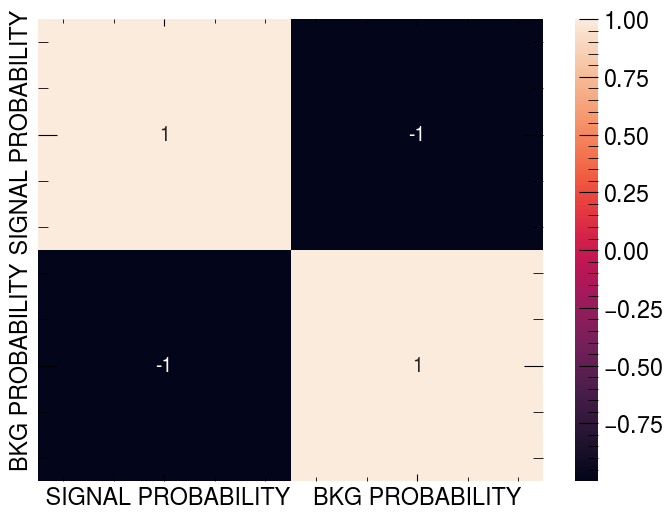

In [89]:
only_prob = data[[' SIGNAL PROBABILITY', 'BKG PROBABILITY']]
sns.heatmap(only_prob.corr(), annot=True)

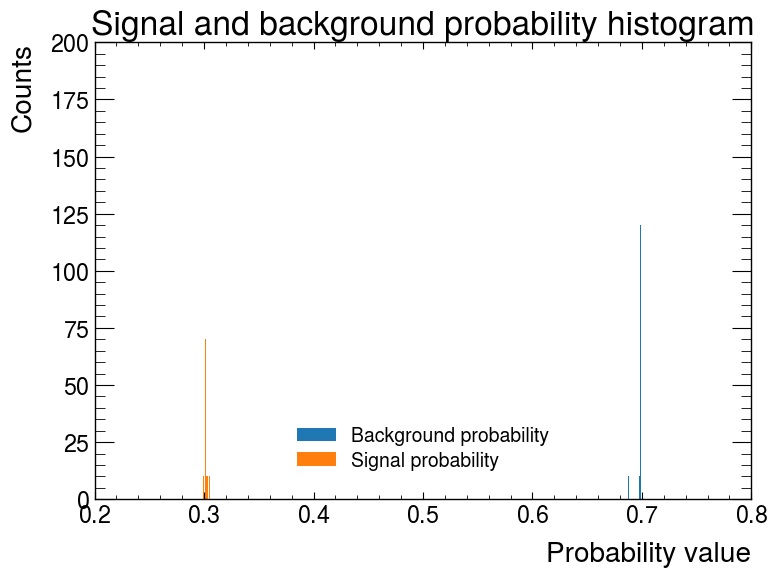

In [90]:
plt.hist(bkg, bins=100, label="Background probability")
plt.hist(sig, bins=100, label="Signal probability")
plt.xlabel("Probability value")
plt.ylabel("Counts")
plt.title("Signal and background probability histogram")
plt.legend()
plt.tight_layout()

## Root mean squared error RMS

In [91]:
rms_sig = np.sqrt(np.sum(sig**2)/N)
rms_bkg = np.sqrt(np.sum(bkg**2)/N)
print(rms_sig, rms_bkg)

0.3017024011524933 0.6982863507114828


## Average error

In [92]:
bkg_std = bkg.std()
sig_std = sig.std()

bkg_av_error = bkg_std / np.sqrt(N)
sig_av_error = sig_std / np.sqrt(N)

print(str(bkg_av_error), "Average bkg error")
print(str(sig_av_error), "Average sig error")

5.631348429639209e-05 Average bkg error
5.6236190432852045e-05 Average sig error


## Manual correlation coefficient

![Alt text](image-1.png)

In [93]:
n_pairs = len(bkg)
new_bkg_mean = np.mean(bkg)
new_sig_mean = np.mean(sig)

new_bkg_std = np.std(bkg)
new_sig_std = np.std(sig)

std_multi = new_bkg_std*new_sig_std
mean_diff_multi = (bkg - new_bkg_mean)*(sig - new_sig_mean)

r = 1/(n_pairs - 1) * np.sum(mean_diff_multi/std_multi)
r

-1.0009614509597433

This is wrong

In [94]:
def man_correlation(x, y, x_av, y_av):
    nominator = np.sum((x-x_av) * (y-y_av))
    denominator = np.sqrt(np.sum((x-x_av)**2)) * np.sqrt(np.sum((y-y_av)**2))
    
    result = nominator/denominator
    return result

total_corr = man_correlation(sig, bkg, sig_mean, bkg_mean)
print("Total correlation coefficient: ", total_corr)

Total correlation coefficient:  -0.9999604895087838


### Correlation coefficient, point by point

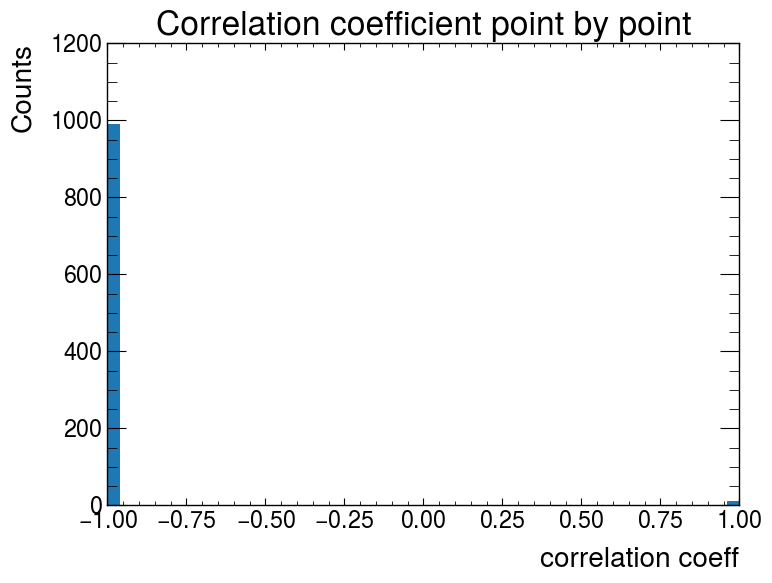

In [95]:
corr_coefficients = []
for i in range(N):
    res = man_correlation(sig[i], bkg[i], sig_mean, bkg_mean)
    corr_coefficients.append(res)
corr_coefficients = np.array(corr_coefficients)
plt.hist(corr_coefficients, bins=50)
plt.title("Correlation coefficient point by point")
plt.xlabel("correlation coeff")
plt.ylabel("Counts")

plt.savefig("corr_point_by_point.pdf")

### Correlation read from data

Text(0.5, 1.0, 'Correlation coefficient read from data')

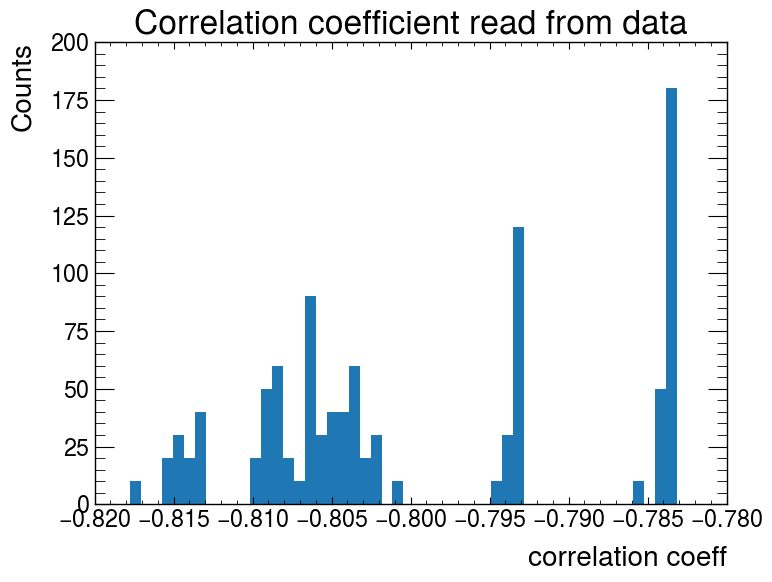

In [96]:
corr_data = np.array(data[' CORR'])
plt.hist(corr_data, bins=50)
plt.xlabel("correlation coeff")
plt.ylabel("Counts")
plt.title("Correlation coefficient read from data")

## Residues and pulls

In [97]:
sig_err = data[' SIGNAL ERROR']
bkg_err = data[' BKG ERROR']

# from scipy.stats import norm

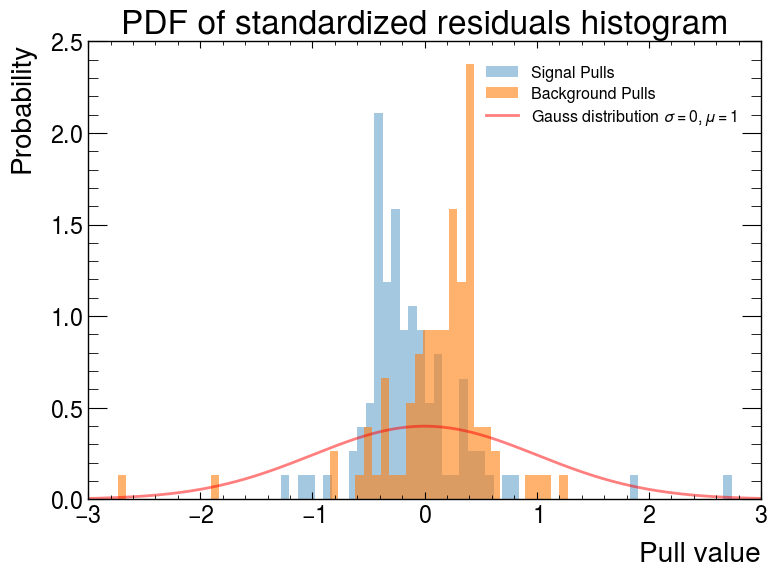

In [101]:
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming sig, bkg, sig_pred, and bkg_pred are defined
sig_pred = 0.3
bkg_pred = 0.7

# Calculate residuals
sig_residues = sig - sig_pred
bkg_residues = bkg - bkg_pred

# Calculate pulls (standardized residuals)
bkg_pulls = stats.zscore(bkg)
sig_pulls = stats.zscore(sig)

weights = np.ones_like(sig_pulls) / len(sig_pulls)

# Plot histograms of pulls
plt.hist(sig_pulls, bins=100, alpha=0.4, label='Signal Pulls', density=True)
plt.hist(bkg_pulls, bins=100, alpha=0.6, label='Background Pulls', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)
plt.xlim([-3, 3])
plt.xlabel("Pull value")
plt.ylabel("Probability")
plt.title('PDF of standardized residuals histogram')
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
# Show legen
plt.show()


#### Different way standardised residues

Text(1, 0, 'Pull value')

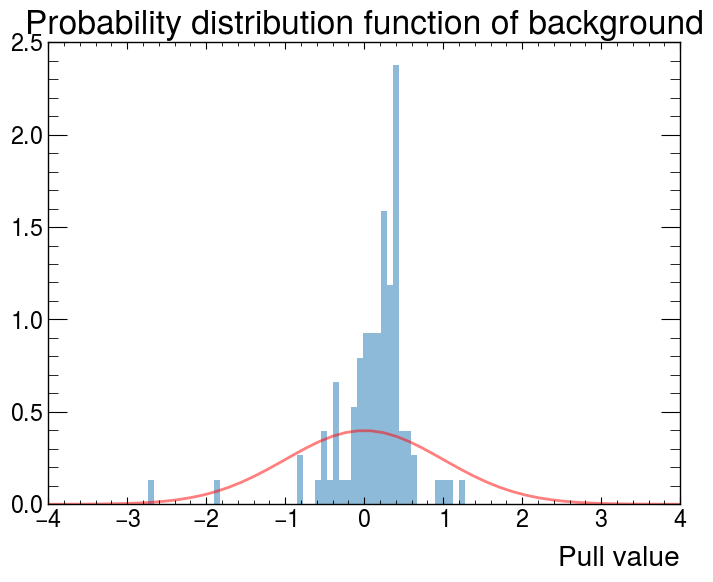

In [ ]:
from scipy import stats

f= stats.zscore(bkg)
weights = np.ones_like(sig_pulls) / len(bkg)
plt.hist(f, bins=100, density=True, alpha=0.5)
plt.xlim([-4, 4])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)
plt.title("Probability distribution function of background")
plt.xlabel("Pull value")

Text(1, 0, 'Pull value')

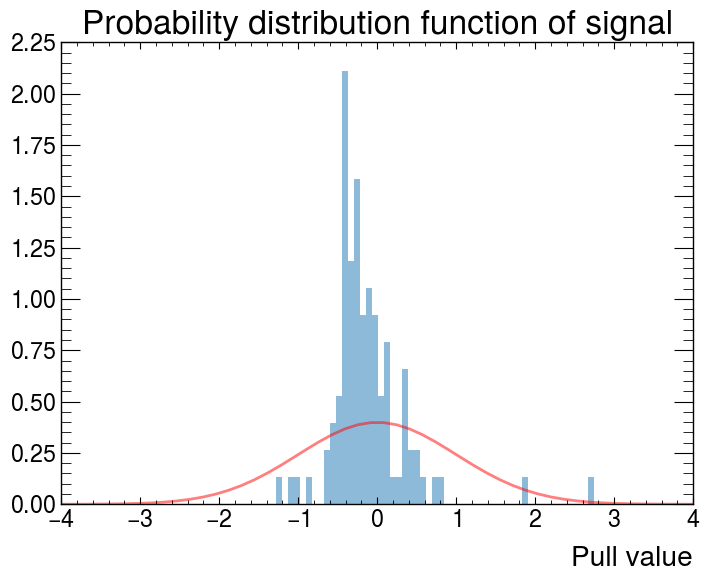

In [ ]:
sig_zscore = stats.zscore(sig)
weights = np.ones_like(sig) / len(sig)
plt.hist(sig_zscore, bins=100, density=True, alpha=0.5)
plt.xlim([-4, 4])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)
plt.title("Probability distribution function of signal")
plt.xlabel("Pull value")

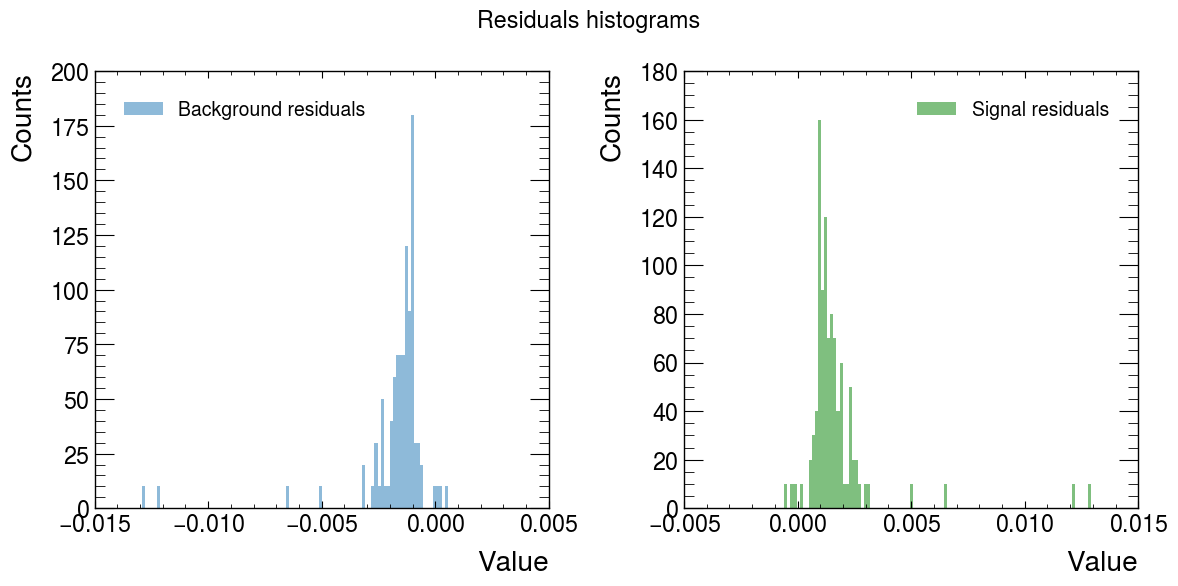

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed

plt.subplot(1, 2, 1)
plt.hist(bkg_residues, bins=100, alpha=0.5, label='Background residuals')
plt.ylabel("Counts")
plt.xlabel("Value")
plt.ticklabel_format(axis='x', style='plain')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sig_residues, bins=100, alpha=0.5, color='green', label='Signal residuals')
plt.ylabel("Counts")
plt.xlabel("Value")
plt.ticklabel_format(axis='x', style='plain')
plt.legend()

plt.suptitle("Residuals histograms")
plt.tight_layout()

plt.savefig("residuals.pdf")


## Standardised residuals other way

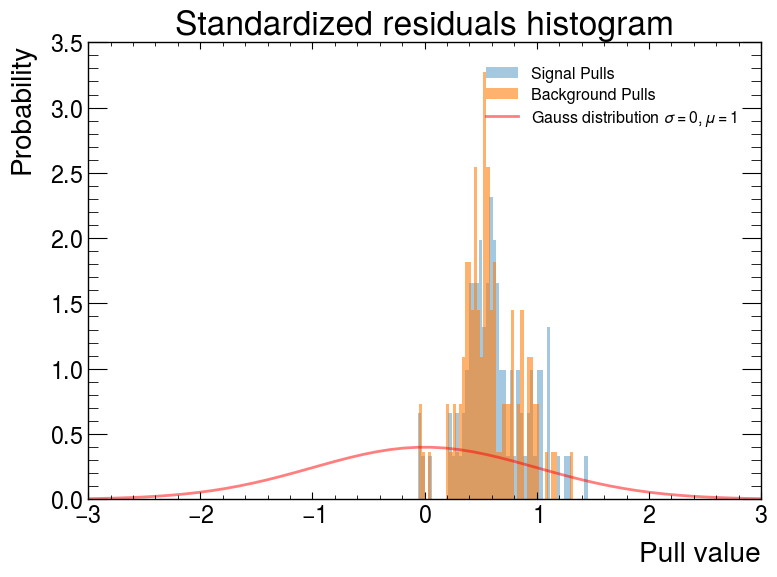

In [ ]:
# Assuming sig, bkg, sig_pred, and bkg_pred are defined
sig_pred = 0.3
bkg_pred = 0.7

# Calculate residuals
sig_residues = sig - sig_pred
bkg_residues = bkg - bkg_pred

# Calculate pulls (standardized residuals)
sig_pulls = sig_residues / sig_err
bkg_pulls = sig_residues / bkg_err

weights = np.ones_like(sig_pulls) / len(sig_pulls)

# plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', weights=weights)
# plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', weights=weights)

plt.hist(sig_pulls, bins=50, alpha=0.4, label='Signal Pulls', density=True, stacked=True)
plt.hist(bkg_pulls, bins=50, alpha=0.6, label='Background Pulls', density=True, stacked=True)

plt.xlim([-3, 3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
gauss = norm.pdf(x, 0, 1)
plt.plot(x, gauss, label=r'Gauss distribution $\sigma = 0, \mu = 1$', linestyle='-', color='red', alpha=0.5,)

plt.xlabel("Pull value")
plt.ylabel("Probability")
plt.title('Standardized residuals histogram')
plt.legend(fontsize="11.5", loc ="upper right")
plt.tight_layout()
# Show legen
# plt.show()

plt.savefig('pulls.pdf')


## Scatter plot bkg sig

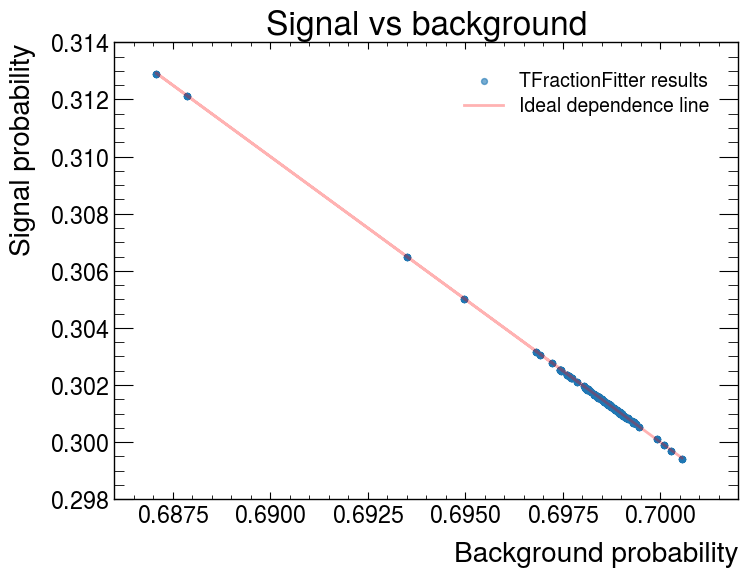

In [ ]:
plt.scatter(bkg, sig, s=18, alpha=0.6, label='TFractionFitter results')
plt.xlabel("Background probability")
plt.ylabel("Signal probability")
plt.title("Signal vs background")
teo_sig = 1 - bkg
plt.plot(bkg, teo_sig, c='r', alpha=0.3, label='Ideal dependence line')
plt.legend()
plt.tight_layout()

plt.savefig("sig_vs_bkg.pdf")
